# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2384 Кочуров Александр Дмитриевич и Чепасов Дмитрий Витальевич. Вариант №18

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:
$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$$
Формула трапеций:
$$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$$
Формула Симпсона:
$$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$$
Формула для интегрирования по «правилу 3/8»:
$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$
Связь передаточной функции для круговой частоты и циклической:
$$H(w) = H(2 \pi f) = \tilde H(f)$$

## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

## Задание 1
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.


### Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле прямоугольников

Формула прямоугольников:

$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0
$

Пусть входной сигнал гармонический:

$$
s_n = e^{i \omega n}, \quad y_n = H(\omega)e^{i \omega n},
$$

где $ H(\omega)$ — частотная передаточная функция фильтра.

После подстановки в основное получаем следующее:

$
y_{n+1} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)}, y_{n+1} = H(\omega)e^{i\omega (n+1)}.
$

### Вывод передаточной функции

Подставим второе выражение во второе уравнение и приравняем:

$
H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)}
$
$
\rightarrow
$
$
H(\omega)e^{i\omega n}(e^{i\omega} - 1) = e^{i\omega n}e^{i 1/2\omega}
$
$\rightarrow $
$
H(\omega)(e^{i\omega} - 1) = e^{i 0.5\omega}
$
$\rightarrow $
$
H(\omega) = \dfrac{e^{i 0.5\omega}}{e^{i\omega} - 1}
$
$
\rightarrow H(\omega) = \frac {1}{2i sin(\frac{\omega}{2})}
$

$
\gamma = \frac{\text{Calculated}}{\text{Accurate}} = 
\frac{i\omega}{2i\sin(\omega/2)} 
= \frac{\omega/2}{\sin(\omega/2)}.
$

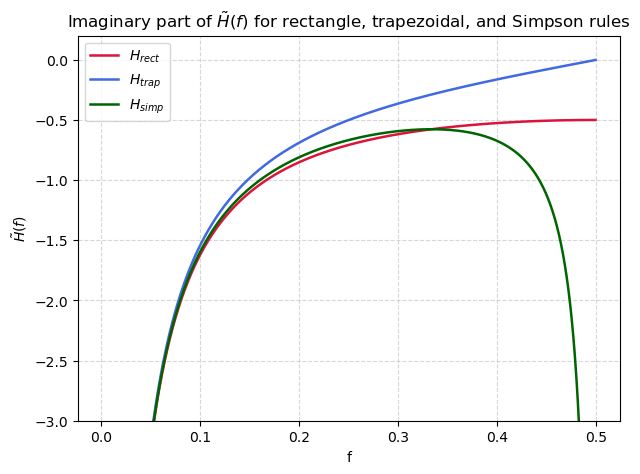

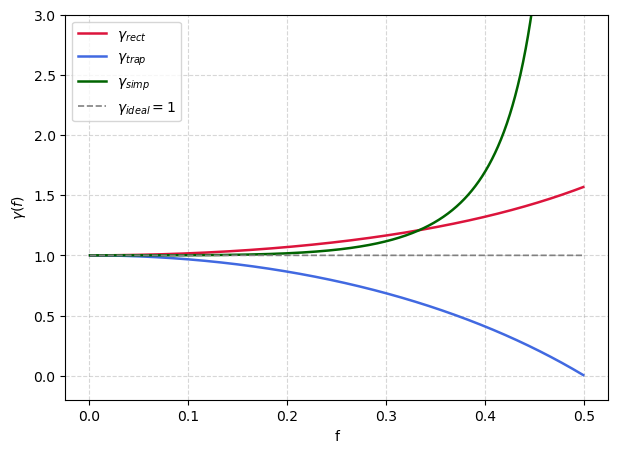

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1e-3, 0.5 - 1e-3, 1500)
w = 2 * np.pi * f

H_r = 1 / (2j * np.sin(w / 2))
H_t = np.cos(w / 2) / (2j * np.sin(w / 2))
H_s = (2 + np.cos(w)) / (3j * np.sin(w))

g_r = (0.5 * w) / np.sin(0.5 * w)
g_t = (0.5 * w * np.cos(0.5 * w)) / np.sin(0.5 * w)
g_s = w * (np.cos(w) + 2) / (3 * np.sin(w))

g_id = np.ones_like(f)

plt.figure(figsize=(7, 5))
plt.title(r'Imaginary part of $\tilde{H}(f)$ for rectangle, trapezoidal, and Simpson rules')
plt.plot(f, np.imag(H_r), color='crimson', lw=1.8, label=r'$H_{rect}$')
plt.plot(f, np.imag(H_t), color='royalblue', lw=1.8, label=r'$H_{trap}$')
plt.plot(f, np.imag(H_s), color='darkgreen', lw=1.8, label=r'$H_{simp}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H}(f)$')
plt.ylim(-3, 0.2)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(f, g_r, lw=1.8, label=r'$\gamma_{rect}$', color='crimson')
plt.plot(f, g_t, lw=1.8, label=r'$\gamma_{trap}$', color='royalblue')
plt.plot(f, g_s, lw=1.8, label=r'$\gamma_{simp}$', color='darkgreen')
plt.plot(f, g_id, 'gray', lw=1.2, linestyle='--', label=r'$\gamma_{ideal} = 1$')
plt.xlabel('f')
plt.ylabel(r'$\gamma(f)$')
plt.ylim(-0.2, 3)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()


Выводы: 
    На НЧ — все методы работают почти одинаково и точно.  
    На СЧ — метод Симпсона ближе всего к идеальному интегратору; прямоугольники завышают, трапеции — немного занижают результат.  
    На ВЧ — 
     1) Симпсон — резкие скачки, чувствителен к шуму;
     2) Прямоугольники — почти не фильтруют ВЧ — плохо при шуме;
    3) Трапеции — плавно подавляют ВЧ, самый устойчивый.
     
Итого:
Для практики чаще всего лучше брать метод трапеций — он надёжный и сбалансированный. Симпсон точнее, но «капризный», прямоугольники — проще, но грубее. 

## Задание 2
Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.


### Передаточная функция рекурсивного фильтра для интегрирования «по правилу 3/8»

Формула численного интегрирования по правилу 3/8 имеет вид:

$$
y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})
$$

$
y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}), \\[6pt]
y_{n+2} = H(\omega)e^{i\omega (n+2)}.
$

### Вывод передаточной функции

$
H(\omega)e^{i\omega (n+2)} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}).
$



$
H(\omega)(e^{i2\omega} - e^{-i\omega}) = \frac{1}{8}(e^{i2\omega} + 3e^{i\omega} + 3 + e^{-i\omega}).
$$


$
H(\omega) = \frac{e^{i\omega} + 3 + 3e^{-i\omega} + e^{-i2\omega}}{8(e^{i\omega} - e^{-i2\omega})}.
$


$
H(\omega) =  \frac{\cos\!\left(\tfrac{3\omega}{2}\right) + 3\cos\!\left(\tfrac{\omega}{2}\right)}
{8i\sin\!\left(\tfrac{3\omega}{2}\right)}.
$

$
\gamma = \frac{\text{Calculated}}{\text{Accurate}}
= \frac{1}{8}\,\frac{\left(\cos\!\frac{3\omega}{2} + 3\cos\!\frac{\omega}{2}\right)\omega}
{\sin\!\frac{3\omega}{2}}.
$


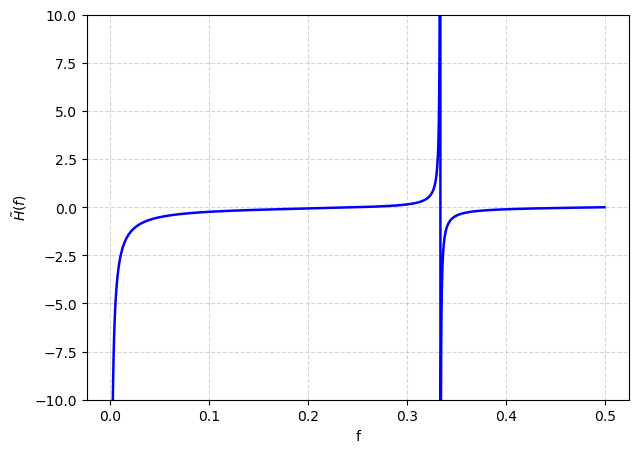

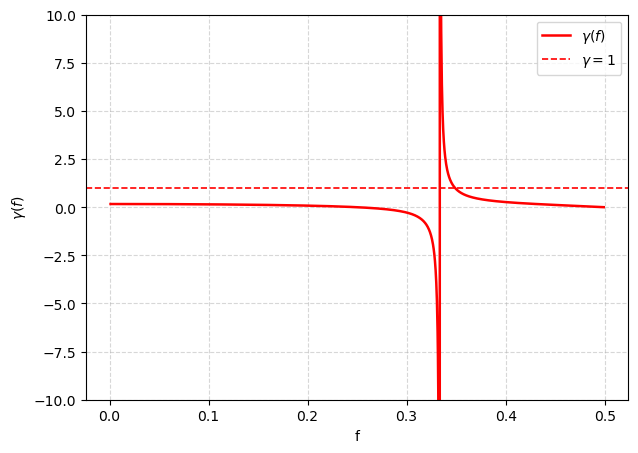

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1e-3, 0.5 - 1e-3, 1500)
w = 2 * np.pi * f

H_38 = (np.cos(1.5 * w) + np.cos(0.5 * w)) / (8j * np.sin(1.5 * w))
g_38 = (np.cos(1.5 * w) + np.cos(0.5 * w)) * w / (8 * np.sin(1.5 * w))

plt.figure(figsize=(7, 5))
plt.plot(f, np.imag(H_38), color='blue', lw=1.8)
plt.xlabel('f')
plt.ylabel(r'$\tilde{H}(f)$')
plt.ylim(-10, 10)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(f, g_38, color='red', lw=1.8, label=r'$\gamma(f)$')
plt.axhline(1, color='red', lw=1.2, ls='--', label=r'$\gamma=1$')
plt.xlabel('f')
plt.ylabel(r'$\gamma(f)$')
plt.ylim(-10, 10)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()

Метод 3/8:
— На НЧ немного недоинтегрирует (𝛾 < 1);
— В районе 𝑓 ≈ 1/3 — резкий всплеск (может усилить шум);
— На ВЧ — быстро падает, но из-за всплеска ведёт себя неустойчиво.   

Вывод: Подходит только для очень медленных сигналов. В реальных задачах — хуже трапеций и Симпсона. 

## Задание 3
Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

Низкие частоты (НЧ): Все методы (прямоугольников, трапеций, Симпсона, 3/8) ведут себя почти как идеальные интеграторы. Они хорошо передают амплитуду и фазу, а также эффективно интегрируют медленные сигналы.

Средние частоты (СЧ):
Прямоугольники — немного завышают коэффициент 𝛾.
Трапеции — стабильны, но немного занижают коэффициент.
Симпсон — даёт наилучшее приближение к идеальному отклику.
Метод 3/8 — появляются локальные всплески 𝛾 и искажения фазы.

Высокие частоты (ВЧ):
У метода 3/8 — полюс примерно при 𝑓 ≈ 1/3, что вызывает резкие искажения амплитудно-частотной характеристики (АЧХ).
Симпсон — теряет устойчивость при 𝑓 → 0.5.
Трапеции — имеют плавное и монотонное затухание, с максимальной устойчивостью.
Прямоугольники — плохо подавляют высокие частоты, чувствительны к шуму.

Вывод: Наиболее сбалансированным методом по точности и устойчивости остаются трапеции.

## Выводы

В работе получены передаточные функции рекурсивных фильтров, реализующих квадратурные формулы: прямоугольников, трапеций, Симпсона и правило 3/8. Проведён частотный анализ их амплитудных характеристик и коэффициентов усиления 𝛾(𝑓). 

Все методы обеспечивают высокую точность в области низких частот, что подтверждает их корректность при интегрировании гладких сигналов. 

На средних и высоких частотах поведение различается:
— метод прямоугольников завышает амплитуду;
— метод трапеций демонстрирует монотонное затухание и наибольшую устойчивость;
— метод Симпсона обеспечивает наилучшее приближение к идеальному интегратору вплоть до 𝑓 ≈ 0.4;
— правило 3/8 обладает полюсом при 𝑓 ≈ 1/3, что приводит к резким искажениям и неустойчивости. 

Метод трапеций оптимален по сочетанию точности, устойчивости и простоты реализации.
Правило 3/8, несмотря на высокий формальный порядок точности, непригодно для сигналов с заметными среднечастотными компонентами. 